# EDA（Exploratory Data Analysis）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# データ読み込み
employee_df = pd.read_csv('./input_data/employee_information.csv')
display(employee_df.head(3))

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [3]:
# ヘッダーありデータでcolumn名を再定義したデータ読み込み
employee_df = pd.read_csv('./input_data/employee_information.csv', names = ['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6'], header=0)
display(employee_df.head(3))

,col_1,col_2,col_3,col_4,col_5,col_6
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [4]:
# indexを定義したデータ読み込み
employee_df = pd.read_csv('./input_data/employee_information.csv', index_col = 'First Name')
display(employee_df.head(3))

,Last Name,Salary,Years with Company,Postal Code,Email
First Name,,,,,
Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [5]:
# indexをリセット
employee_df.reset_index(inplace=True)
display(employee_df.head(3))

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [6]:
# 行列数の確認
employee_df.shape

(10, 6)

In [7]:
# データタイプの確認
employee_df.dtypes

First Name             object
Last Name              object
Salary                float64
Years with Company      int64
Postal Code            object
Email                  object
dtype: object

In [8]:
# 基本統計量の確認
employee_df.describe()

,Salary,Years with Company
count,10.000000,10.00000
mean,22140.013000,10.10000
std,30613.044026,6.52261
min,2629.130000,2.00000
25%,5906.740000,5.50000
50%,9536.010000,9.50000
75%,17768.005000,12.75000
max,100000.000000,23.00000


In [9]:
# カラム名の確認
employee_df.columns

Index(['First Name', 'Last Name', 'Salary', 'Years with Company',
       'Postal Code', 'Email'],
      dtype='object')

In [10]:
# 特定のカラムを欠損させる
employee_df = pd.read_csv('./input_data/employee_information.csv')
employee_df.iloc[2, 3] = np.nan
employee_df.iloc[4, 4] = np.nan

In [11]:
# 欠損値の有無
employee_df.isnull().any()

First Name            False
Last Name             False
Salary                False
Years with Company     True
Postal Code            True
Email                 False
dtype: bool

In [12]:
# 欠損値の数
employee_df.isnull().sum()

First Name            0
Last Name             0
Salary                0
Years with Company    1
Postal Code           1
Email                 0
dtype: int64

In [13]:
# 欠損値ではない数やデータ型を表示
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   First Name          10 non-null     object 
 1   Last Name           10 non-null     object 
 2   Salary              10 non-null     float64
 3   Years with Company  9 non-null      float64
 4   Postal Code         9 non-null      object 
 5   Email               10 non-null     object 
dtypes: float64(2), object(4)
memory usage: 608.0+ bytes


In [14]:
# Nullデータ行を削除
employee_df.dropna(how = 'any')

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3.0,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8.0,N8S 14K,nsmall@hotmail.com
3,Chanel,Steve,11072.02,12.0,N7T 3E6,chanel@gmail.com
5,Samer,Mo,100000.00,13.0,J7H 3HY,samer@gmail.com
6,Heba,Steve,50000.00,7.0,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,20000.00,5.0,J8Y 3M0,Laila.a@hotmail.com
8,Joseph,Patton,2629.13,2.0,M6U 5U7,daafeja@boh.jm
9,Noah,Moran,8626.96,11.0,K2D 4M9,guutodi@bigwoc.kw


In [15]:
# 特定列のNullデータ行を削除
employee_df.dropna(how = 'any', subset = 'Years with Company')

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3.0,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8.0,N8S 14K,nsmall@hotmail.com
3,Chanel,Steve,11072.02,12.0,N7T 3E6,chanel@gmail.com
4,Kate,Noor,5000.00,23.0,NaN,kate@hotmail.com
5,Samer,Mo,100000.00,13.0,J7H 3HY,samer@gmail.com
6,Heba,Steve,50000.00,7.0,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,20000.00,5.0,J8Y 3M0,Laila.a@hotmail.com
8,Joseph,Patton,2629.13,2.0,M6U 5U7,daafeja@boh.jm
9,Noah,Moran,8626.96,11.0,K2D 4M9,guutodi@bigwoc.kw


In [16]:
employee_df = pd.read_csv('./input_data/employee_information.csv')

In [17]:
# 特定行のみにアクセス
employee_df[5:8]

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
5,Samer,Mo,100000.0,13,J7H 3HY,samer@gmail.com
6,Heba,Steve,50000.0,7,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,20000.0,5,J8Y 3M0,Laila.a@hotmail.com


In [18]:
# 任意の列にデータを追加
employee_df.insert(0, column = 'Credit Score', value = [680, 700, 750, 699, 550, 600, 750, 500, 520, 510])
display(employee_df.head(3))

,Credit Score,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,680,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,700,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,750,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [19]:
# 特定列を削除
employee_df.drop(labels = ["Last Name", "Salary"], axis = 1).head(3)

,Credit Score,First Name,Years with Company,Postal Code,Email
0,680,Mike,3,N94 3M0,bird@gmail.com
1,700,Noah,8,N8S 14K,nsmall@hotmail.com
2,750,Nina,17,S1T 4E6,azikez@gahew.mr


In [20]:
# 特定列を削除
del employee_df['Credit Score']
display(employee_df.head(3))

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [21]:
# intやfloat型だけを選択
employee_df.select_dtypes(include='number')

,Salary,Years with Company
0,5000.00,3
1,10000.00,8
2,9072.02,17
3,11072.02,12
4,5000.00,23
5,100000.00,13
6,50000.00,7
7,20000.00,5
8,2629.13,2
9,8626.96,11


In [22]:
# strやlist, dict型を選択
employee_df.select_dtypes(include='object')

,First Name,Last Name,Postal Code,Email
0,Mike,Moe,N94 3M0,bird@gmail.com
1,Noah,Ryan,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,S1T 4E6,azikez@gahew.mr
3,Chanel,Steve,N7T 3E6,chanel@gmail.com
4,Kate,Noor,K8N 5H6,kate@hotmail.com
5,Samer,Mo,J7H 3HY,samer@gmail.com
6,Heba,Steve,K8Y 3M8,heba.ismail@hotmail.com
7,Laila,Aly,J8Y 3M0,Laila.a@hotmail.com
8,Joseph,Patton,M6U 5U7,daafeja@boh.jm
9,Noah,Moran,K2D 4M9,guutodi@bigwoc.kw


In [23]:
# 特定indexの行を選択
employee_df.loc[0]

First Name                      Mike
Last Name                        Moe
Salary                        5000.0
Years with Company                 3
Postal Code                  N94 3M0
Email                 bird@gmail.com
Name: 0, dtype: object

In [24]:
# 特定indexの行を選択
employee_df.iloc[1]

First Name                          Noah
Last Name                           Ryan
Salary                           10000.0
Years with Company                     8
Postal Code                      N8S 14K
Email                 nsmall@hotmail.com
Name: 1, dtype: object

In [25]:
# 特定indexの行を選択
employee_df.iloc[[2, 4, 9]]

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr
4,Kate,Noor,5000.00,23,K8N 5H6,kate@hotmail.com
9,Noah,Moran,8626.96,11,K2D 4M9,guutodi@bigwoc.kw


In [26]:
# 特定indexの行を選択した後に特定列を選択
employee_df.iloc[4, 0:3]

First Name      Kate
Last Name       Noor
Salary        5000.0
Name: 4, dtype: object

In [27]:
# ランダムな行を選択
employee_df.sample(n = 5, axis = 0) # axis = 0 は行, axis = 1 は列を意味する

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com
5,Samer,Mo,100000.00,13,J7H 3HY,samer@gmail.com
7,Laila,Aly,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
4,Kate,Noor,5000.00,23,K8N 5H6,kate@hotmail.com
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm


In [28]:
# ランダムな列を選択
employee_df.sample(n = 3, axis = 1).head(3) # axis = 0 は行, axis = 1 は列を意味する

,Email,Years with Company,Postal Code
0,bird@gmail.com,3,N94 3M0
1,nsmall@hotmail.com,8,N8S 14K
2,azikez@gahew.mr,17,S1T 4E6


In [29]:
# ソート
employee_df.sort_values('Years with Company', ascending=True).head() # ascending= Trueは昇順、Falseは降順

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
8,Joseph,Patton,2629.13,2,M6U 5U7,daafeja@boh.jm
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
7,Laila,Aly,20000.00,5,J8Y 3M0,Laila.a@hotmail.com
6,Heba,Steve,50000.00,7,K8Y 3M8,heba.ismail@hotmail.com
1,Noah,Ryan,10000.00,8,N8S 14K,nsmall@hotmail.com


In [30]:
# 特定のカラムを欠損させる
employee_df = pd.read_csv('./input_data/employee_information.csv')
employee_df.iloc[1, 2] = np.nan
employee_df.head(3)

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.00,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,NaN,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.02,17,S1T 4E6,azikez@gahew.mr


In [31]:
# 欠損値を平均で穴埋め
employee_df["Salary"].fillna(employee_df['Salary'].mean(), inplace = True)
employee_df.head(3)

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.000000,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,23488.903333,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.020000,17,S1T 4E6,azikez@gahew.mr


In [32]:
# 重複削除
employee_df.drop_duplicates().head(3)

,First Name,Last Name,Salary,Years with Company,Postal Code,Email
0,Mike,Moe,5000.000000,3,N94 3M0,bird@gmail.com
1,Noah,Ryan,23488.903333,8,N8S 14K,nsmall@hotmail.com
2,Nina,Keller,9072.020000,17,S1T 4E6,azikez@gahew.mr


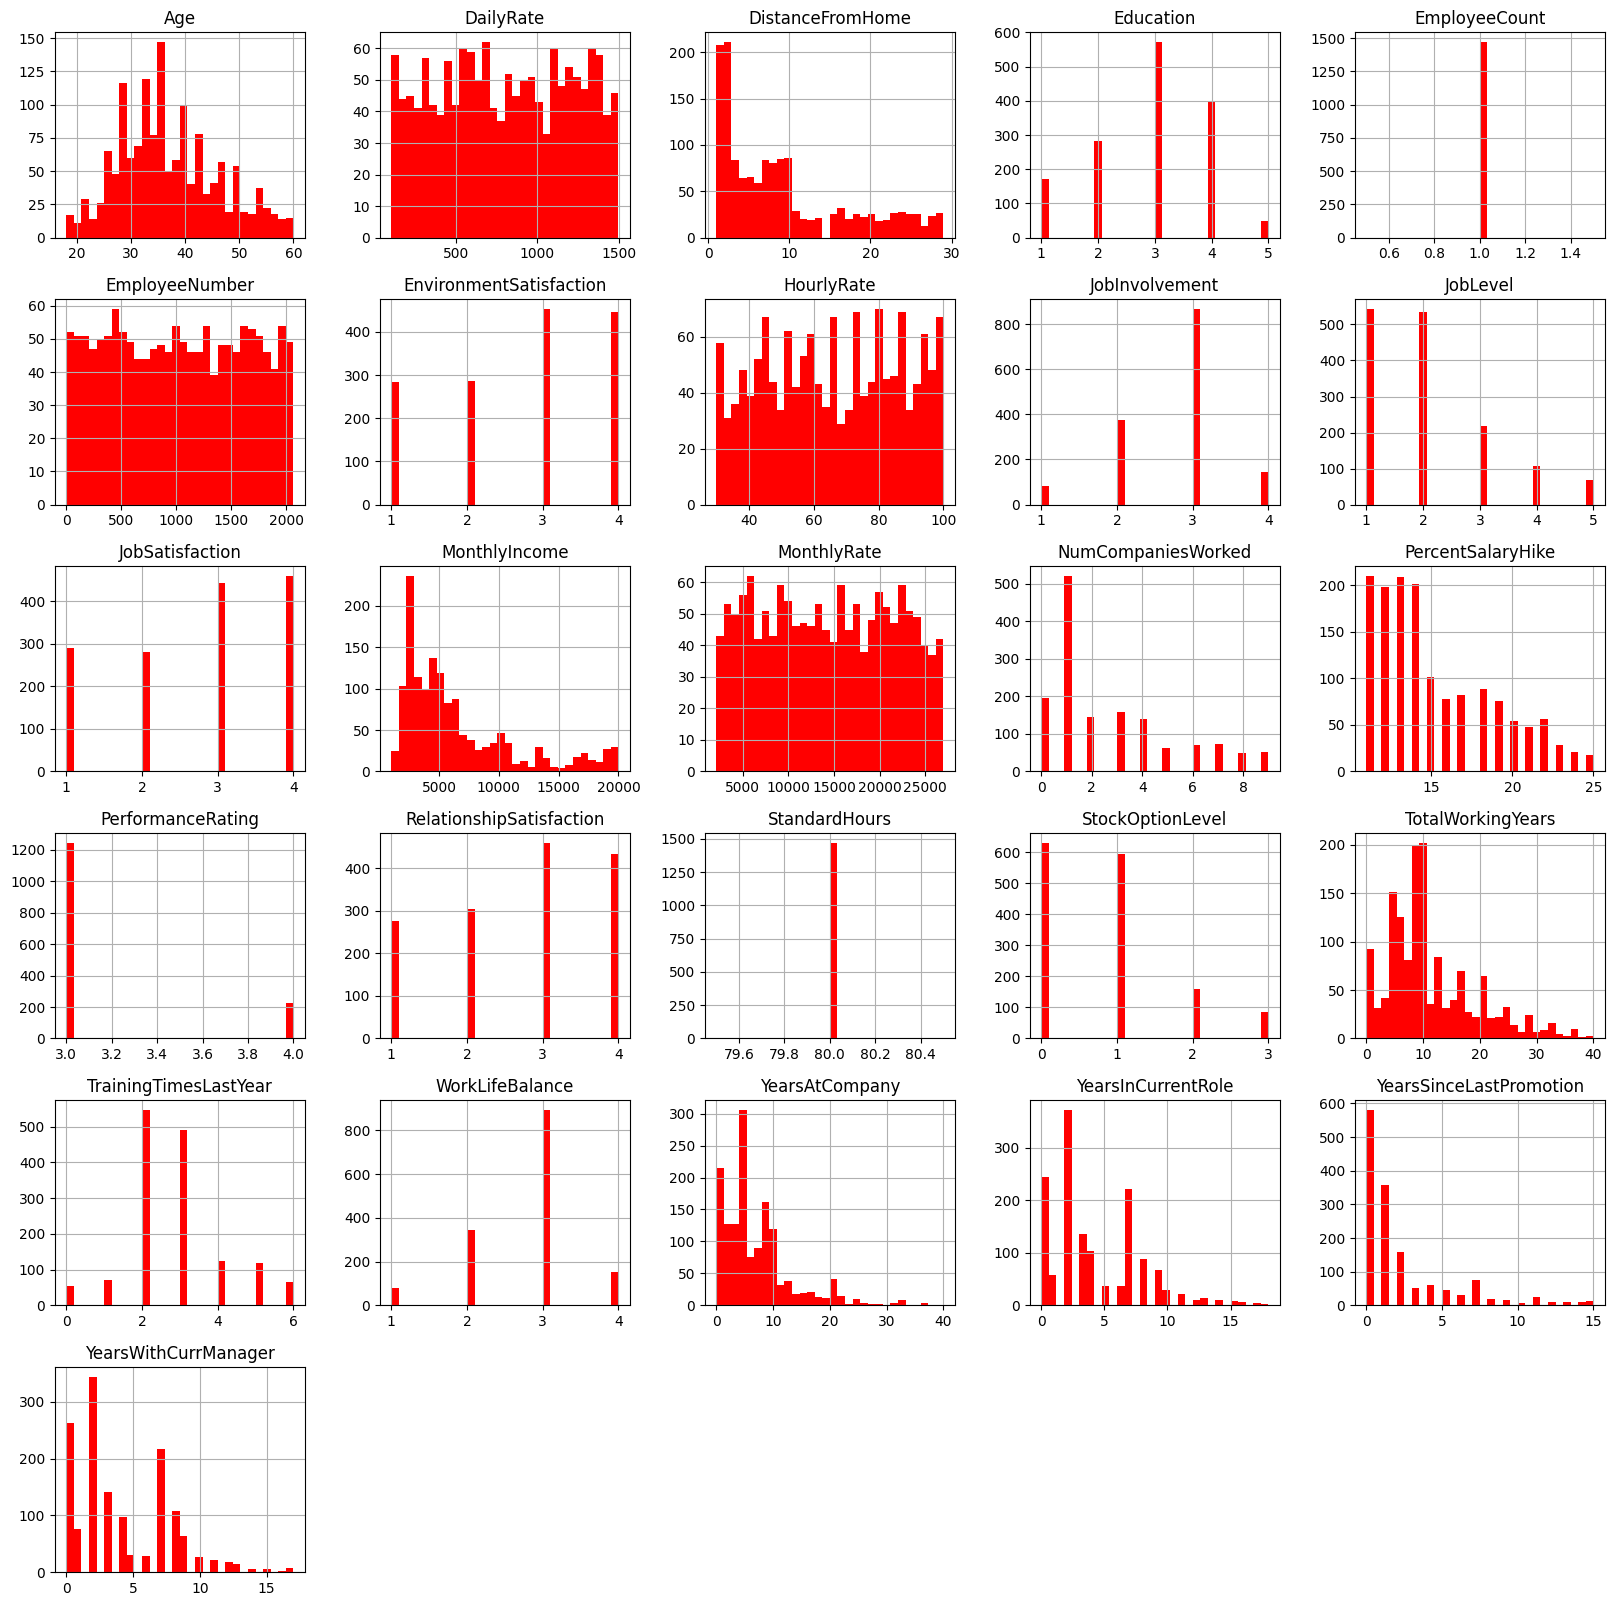

In [33]:
# 統計量を表示
hr_df = pd.read_csv('./input_data/Human_Resources.csv')
hr_df.hist(bins = 30, figsize = (20,20), color = 'r');

<Axes: >

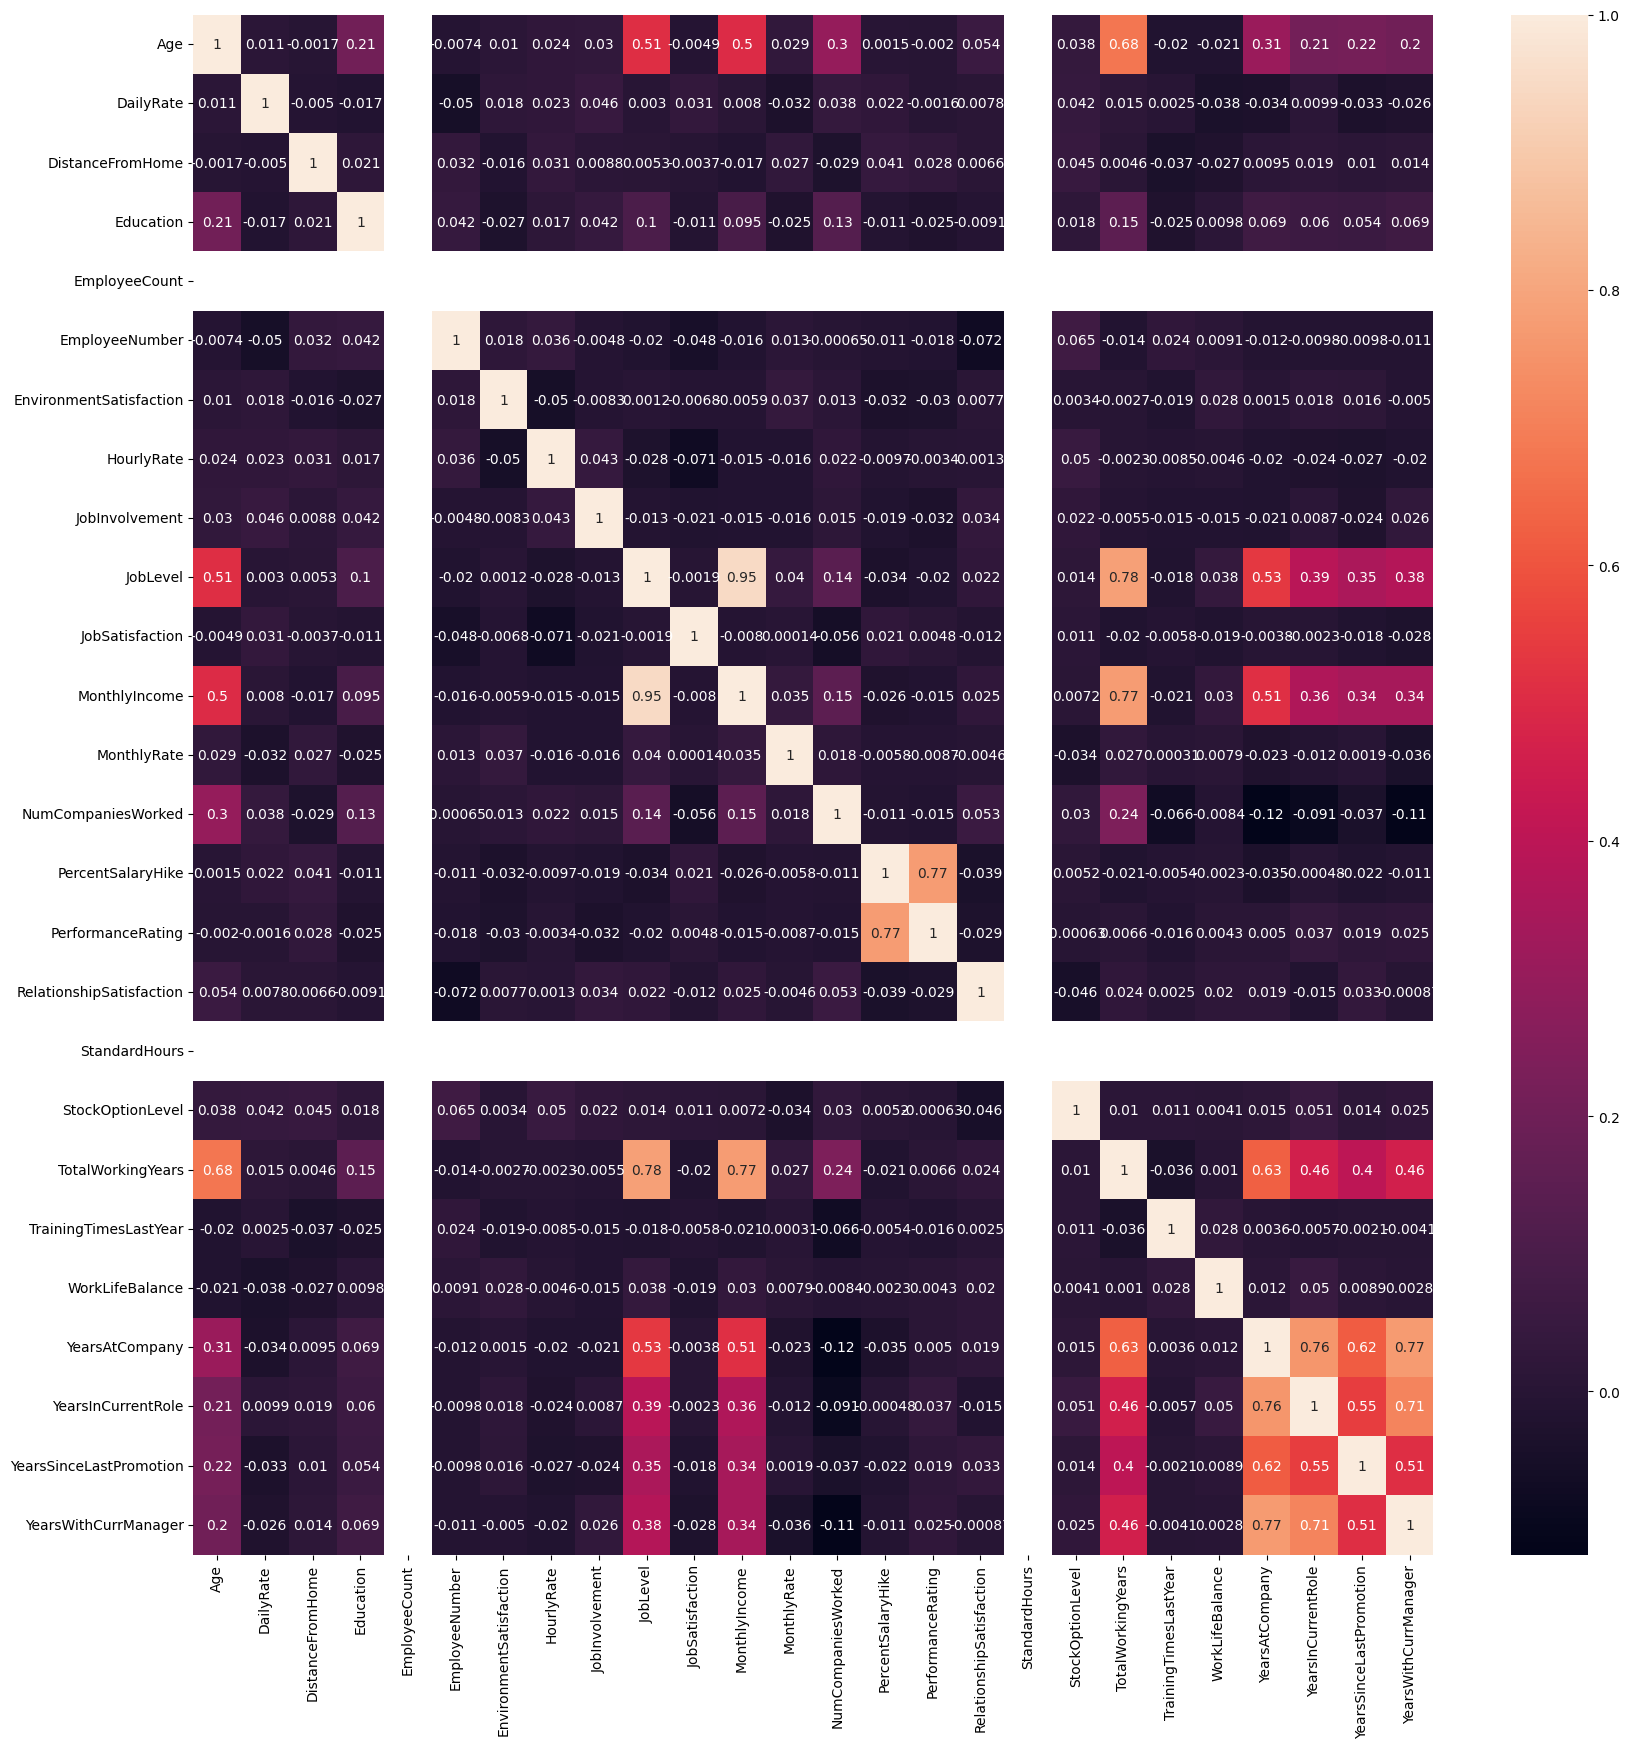

In [34]:
tmp_hr_df = hr_df.select_dtypes(include='number')
correlations = tmp_hr_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)